# Alineamiento con Biopython

## de la pagina
https://medium.com/towards-data-science/pairwise-sequence-alignment-using-biopython-d1a9d0ba861f


In [1]:
from Bio import pairwise2, SeqIO
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.SeqRecord import SeqRecord
import os
from Bio.Align.Applications import ClustalwCommandline
from Bio import Phylo

## Alineamiento

In [2]:
pwd

'/Users/migueldelrio/Desktop/curso/jupyter'

In [3]:
cd ../data/fasta/

/Users/migueldelrio/Desktop/curso/data/fasta


In [4]:
f= open("secuencias_anotadas.fasta", "r")
n=0
for rec in SeqIO.parse(f, "fasta"):
    print (rec.id, "\t" ,rec.description[:30])   

Nav1_2_B_halotolerans 	 Nav1_2_B_halotolerans Bacillus
Nav1_8_B_aquimaris 	 Nav1_8_B_aquimaris Bacillus aq
Nav2_2_A_mediterranea 	 Nav2_2_A_mediterranea Alteromo
PET1_2_H_chejuensis 	 PET1_2_H_chejuensis Hahella ch
PET1_8_P_oceani 	 PET1_8_P_oceani Pseudomonas oc
PET2_2_A_mediterranea 	 PET2_2_A_mediterranea Alteromo
PET2_8_A_mediterranea 	 PET2_8_A_mediterranea Alteromo
PETsn1_2_A_mediterranea 	 PETsn1_2_A_mediterranea Altero
PETsn1_8_A_mediterranea 	 PETsn1_8_A_mediterranea Altero
PHBb1_2_L_janthinus 	 PHBb1_2_L_janthinus Litoreibac


# Alineamiento

In [6]:
ls

secuencias.fasta*          secuencias_completas.fas
secuencias_anotadas.fasta


In [7]:
clustalw_exe = r"/Applications/clustalw/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="secuencias_anotadas.fasta")
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

In [9]:
alignments = AlignIO.parse("secuencias_anotadas.aln", "clustal")
for alignment in alignments:
    print(alignment)
    print("")

SingleLetterAlphabet() alignment with 10 rows and 334 columns
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PET2_2_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PETsn1_2_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT Nav2_2_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PET2_8_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PETsn1_8_A_mediterranea
GACGTCAAGTCATCATGGCCCTTACGGCCAGGGCTACACACGTG...CCT PET1_2_H_chejuensis
GACGTCAAGTCATCATGGCCCTTACGGCCAGGGCTACACACGTG...CCT PET1_8_P_oceani
GACGTCAAGTCCTCATGGCCCTTACGGGTTGGGCTACACACGTG...CCT PHBb1_2_L_janthinus
GACGTCAAATCATCATGCCCCTTATGACCTGGGGTACACACGTG...GGT Nav1_2_B_halotolerans
GACGTCAAATCATCATGCCCCTTATGACTTGGGCTACACACGTG...GGT Nav1_8_B_aquimaris



In [10]:
tree = Phylo.read("secuencias_anotadas.aln", "newick")
Phylo.draw_ascii(tree, file=None, column_width=80)

ZeroDivisionError: float division by zero

/Users/migueldelrio/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.0, right=0.0
  'left=%s, right=%s') % (left, right))


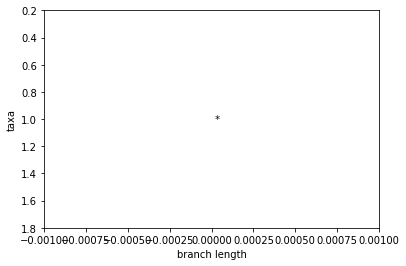

In [12]:
tree.rooted = True
Phylo.draw(tree)

In [4]:
clustalw_exe = r"/Applications/clustalw/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="secuencias_completas.fas")
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

In [5]:
alignments = AlignIO.parse("secuencias_completas.aln", "clustal")
for alignment in alignments:
    print(alignment)
    print("")

SingleLetterAlphabet() alignment with 10 rows and 334 columns
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PET2_2
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PETsn1_2
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT Nav2_2
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PET2_8
GACGTCAAGTCATCATGGCCCTTACGTGTAGGGCTACACACGTG...CCT PETsn1_8
GACGTCAAGTCATCATGGCCCTTACGGCCAGGGCTACACACGTG...CCT PET1_2
GACGTCAAGTCATCATGGCCCTTACGGCCAGGGCTACACACGTG...CCT PET1_8
GACGTCAAGTCCTCATGGCCCTTACGGGTTGGGCTACACACGTG...CCT PHBb1_2
GACGTCAAATCATCATGCCCCTTATGACCTGGGGTACACACGTG...GGT Nav1_2
GACGTCAAATCATCATGCCCCTTATGACTTGGGCTACACACGTG...GGT Nav1_8



In [6]:
tree = Phylo.read("secuencias_completas.aln", "newick")
Phylo.draw_ascii(tree, file=None, column_width=80)

ZeroDivisionError: float division by zero

# para obtener ayuda en clustalw

In [12]:
!/Applications/clustalw/clustalw2 -help




 CLUSTAL 2.1 Multiple Sequence Alignments


                DATA (sequences)

-INFILE=file.ext                             :input sequences.
-PROFILE1=file.ext  and  -PROFILE2=file.ext  :profiles (old alignment).


                VERBS (do things)

-OPTIONS            :list the command line parameters
-HELP  or -CHECK    :outline the command line params.
-FULLHELP           :output full help content.
-ALIGN              :do full multiple alignment.
-TREE               :calculate NJ tree.
-PIM                :output percent identity matrix (while calculating the tree)
-BOOTSTRAP(=n)      :bootstrap a NJ tree (n= number of bootstraps; def. = 1000).
-CONVERT            :output the input sequences in a different file format.


                PARAMETERS (set things)

***General settings:****
-INTERACTIVE :read command line, then enter normal interactive menus
-QUICKTREE   :use FAST algorithm for the alignment guide tree
-TYPE=       :PROTEIN or DNA sequences
-NEGATIVE    :protein align

In [13]:
help(AlignIO)

Help on package Bio.AlignIO in Bio:

NAME
    Bio.AlignIO - Multiple sequence alignment input/output as alignment objects.

DESCRIPTION
    The Bio.AlignIO interface is deliberately very similar to Bio.SeqIO, and in
    fact the two are connected internally.  Both modules use the same set of file
    format names (lower case strings).  From the user's perspective, you can read
    in a PHYLIP file containing one or more alignments using Bio.AlignIO, or you
    can read in the sequences within these alignmenta using Bio.SeqIO.
    
    Bio.AlignIO is also documented at http://biopython.org/wiki/AlignIO and by
    a whole chapter in our tutorial:
    
    * `HTML Tutorial`_
    * `PDF Tutorial`_
    
    .. _`HTML Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.html
    .. _`PDF Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
    
    Input
    -----
    For the typical special case when your file or handle contains one and only
    one alignment, use the func